<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_7_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Support Vector Machine (**SVM**) is a very powerful and versatile Machine Learning
model, capable of performing 
* linear or nonlinear classification, 
* regression, 
* even outlier detection.

It is one of the most popular models in Machine Learning.
SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns
sns.set()

#Motivating Support Vector Machines

**SVMs: A New Generation of Learning Algorithms**
* Pre 1980:
  - Almost all learning methods learned linear decision surfaces.
  - Linear learning methods have nice theoretical properties
* 1980’s
  - Decision trees and NNs allowed efficient learning of nonlinear decision surfaces
  - Little theoretical basis and all suffer from local minima
* 1990’s
  - Efficient learning algorithms for non-linear functions based on computational learning theory developed
  - Nice theoretical properties.

**Key Ideas**
* Two independent developments within last decade
  - New efficient separability of non-linear regions that use "kernel functions": generalization of "similarity" to new kinds of similarity measures based on dot products
  - Use of quadratic optimization problem to avoid "local minimum" issues with neural nets
  - The resulting learning algorithm is an optimization algorithm rather than a greedy search

**Organization**
* Basic idea of support vector machines: just like 1-layer or multi-layer neural nets
  - Optimal hyperplane for linearly separable
patterns
  - Extend to patterns that are not linearly
separable by transformations of original data to
map into new space – the *Kernel* function
* SVM algorithm for pattern recognition

**SVM as linear classifier**

Consider classification function
$$
\text{class} = \text{sign}\left(\vec{x} \cdot \vec{w} + b\right),
$$
that yields $+1$ or $-1$ depending on class it supposes the $x$ belongs to.
$\vec{w}$ and $w_0$ are parameters obtained with training step.


**Support Vectors**
* Support vectors are the data points that lie closest to the decision surface (or hyperplane)
* They are the data points most difficult to classify
* They have direct bearing on the optimum location of the decision surface
* We can show that the optimal hyperplane stems
from the function class with the lowest
"capacity"= # of independent features/parameters
we can twiddle

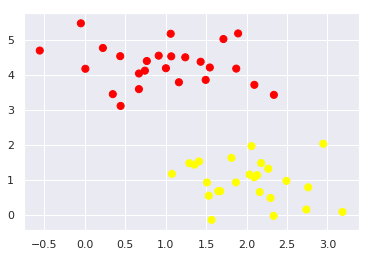

In [0]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

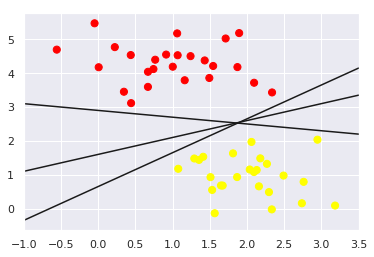

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

* In general, lots of possible solutions (an infinite number!)
* Support Vector Machine (SVM) finds an optimal solution

#Support Vector Machines: Maximizing the Margin

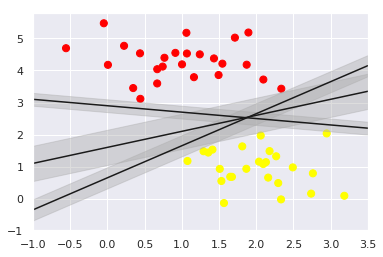

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

#Support vector machines are an example of a maximum margin estimator

* SVMs maximize the margin (Winston terminology: the ‘street’) around the separating hyperplane.
* The decision function is fully specified by a (usually very small) subset of training samples, the support vectors.
* This becomes a Quadratic programming problem that is easy to solve by standard methods

**Separation by Hyperplanes**
* Assume linear separability for now (we will relax this later)
* in 2 dimensions, can separate by a line
  - in higher dimensions, need hyperplanes

**General input/output for SVMs just like for
neural nets, but for one important addition...**

**Input:** set of (input, output) training pair samples; call the input sample features $x_1$, $x_2$, $\dots$, $x_n$, and the output result $y$.
Typically, there can be lots of input features $x_i$.

**Output:** set of weights $w$ (or $w_i$), one for each feature, whose linear combination predicts the value of $y$. (So far, just like neural nets...)

**Important difference:** we use the optimization of maximizing the margin ("street width") to reduce the number of weights
that are nonzero to just a few that correspond to the important features that "matter" in deciding the separating line(hyperplane)... these nonzero weights correspond to the
support vectors (because they "support" the separating hyperplane)

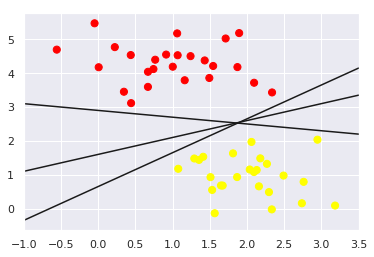

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

Find $a$, $b$, $c$, such that $ax + by \geq c$ for red points $ax + by \leq (or < ) c$ for yellow points.

**Which Hyperplane to pick?**
* Lots of possible solutions for $a$, $b$, $c$.
* Some methods find a separating hyperplane, but not the optimal one (e.g., neural net)
* But: Which points should influence optimality?
  - All points?
    * Linear regression
    * Neural nets
  - Or only "difficult points" close to decision boundary
    * Support vector machines

**Support Vectors again for linearly separable case**
* Support vectors are the elements of the training set that would change the position of the dividing hyperplane if removed.
* Support vectors are the critical elements of the training set
* The problem of finding the optimal hyper plane is an optimization problem and can be solved by optimization techniques (we use Lagrange multipliers to get this problem into a form that can be solved analytically).

**Support Vectors:** Input vectors that just touch the boundary of the margin (street) – circled below, there are 3 of them (or, rather, the ‘tips’ of the vectors)
$$
\vec{w} \cdot \vec{x}_\text{marginal} + b = +1
\quad \text{or} \quad
\vec{w} \cdot \vec{x}_\text{marginal} + b = -1
$$

**Why do we use $+1$ and $-1$?**
Recall linear classifier
$$
\text{class} = \text{sign}\left(\vec{x} \cdot \vec{w} + b\right)
$$
and note that nothing changes if we scale $\vec{w}$ and $w_0$ by the same amount.
As a result we are free to choose scale so that $\vec{w} \cdot \vec{x} + b = \pm 1$

![suport points](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_7/support_points.png)

Here, we have shown the actual support vectors, $v_1$, $v_2$, $v_3$, instead of just the $3$ circled points at the tail ends of the support vectors. $d$ denotes $1/2$ of the street "width"

![suport vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_7/support_vectors.png)

Define the hyperplanes $H$ such that:
$$
\begin{aligned}
\vec{w} \cdot \vec{x}_i + b\geq +1 
\quad\text{when}\quad 
y_i = +1\\
\vec{w} \cdot \vec{x}_i + b\leq -1 
\quad\text{when}\quad 
y_i = -1
\end{aligned}
$$
$H_1$ and $H_2$ are the planes
$$
\begin{aligned}
H_1:\quad \vec{w} \cdot \vec{x}_i + b = +1\\
H_1:\quad \vec{w} \cdot \vec{x}_i + b = -1\\
\end{aligned}
$$
The points on the planes $H_1$ and $H_2$ are the tips of the *Support Vectors*.

The plane $H_0$ is the median inbetween, where $\vec{w} \cdot \vec{x}_i + b = 0$

* $d^+$ -- the shortest distance to the closest positive point
* $d^-$ -- the shortest distance to the closest negative point
The margin (gutter) of a separating hyperplane is $d^+ + d^-$.

![suport vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_7/hyperplanes.png)

Moving a support vector moves the decision boundary | Moving the other vectors has no effect
---|---
![suport vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_7/move_support_vector.png) | ![suport vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_7/move_other_vector.png)

The optimization algorithm to generate the weights proceeds in such a way that only the support vectors determine the weights and thus the boundary

**Defining the separating Hyperplane**
* Form of equation defining the decision surface separating the classes is a hyperplane of the form:
$$
\vec{w} \cdot \vec{x} + b = 0
$$
   - w is a weight vector
   - x is input vector
   - b is bias
* Allows us to write
$$
\begin{aligned}
\vec{w} \cdot \vec{x} + b \geq 0
\quad\text{for}\quad
d_i = +1\\
\vec{w} \cdot \vec{x} + b < 0
\quad\text{for}\quad
d_i = -1\\
\end{aligned}
$$

**Some final definitions**
* Margin of Separation ($d$): the separation between the hyperplane and the closest data point for a given weight vector $\vec{w}$ and bias $b$.
* Optimal Hyperplane (maximal margin): the particular hyperplane for which the margin of separation $d$ is maximized.

**Maximizing the margin (aka street width)**

We want a classifier (linear separator)  with as big a margin as possible.

![suport vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_7/hyperplanes.png)

Recall the distance from a point$(x_0,y_0)$ to a line $Ax + By + c = 0$ is 
$$
\frac{|Ax_0 +By_0 +c|}{\sqrt{A^2+B^2}}
$$
The distance between $H_0$ and $H_1$ is then
$$
\frac{|\vec{w}\cdot\vec{x}+b|}{||w||} = \frac{1}{||w||}
$$
The total distance between $H_1$ and $H_2$ is thus 
$$
\frac{2}{||w||}
$$
In order to maximize the margin, we thus need to minimize $||w||$. With the
condition that there are no datapoints between $H_1$ and $H_2$
$$
\begin{aligned}
\vec{x}_i \cdot \vec{w} + b \geq +1
\quad\text{when}\quad
y_i = +1\\
\vec{x}_i \cdot \vec{w} + b \leq -1
\quad\text{when}\quad
y_i = -1\\
\end{aligned}
$$
Can be combined into
$$
y_i \left(\vec{x}_i \cdot \vec{w} + b\right) \geq +1
$$

**We now must solve a quadratic programming problem**

Problem is to minimize $||w||$, such that discrimination boundary is obeyed, i.e. $\min f(x)$ and $g(x)=0$, which we can rewrite as
$$
\min \frac{1}{2} ||\vec{w}||^2
$$
(Note this is a quadratic function)
$$
y_i \left(\vec{x}_i \cdot \vec{w} + b\right) - 1 = 0
$$
This is a constrained optimization problem. It can be solved by the Lagrangian multipler method. Because it is quadratic, the surface is a paraboloid, with just a
single global minimum (thus avoiding a problem we had with neural nets!)

**Intuition:** find intersection of two functions $f$ and $g$ at a tangent point (intersection = both constraints satisfied; tangent = derivative is 0); this will be a min (or max) for $f$ s.t. the contraint $g$ is satisfied.

![suport vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_7/lagrange_multipliers.png)

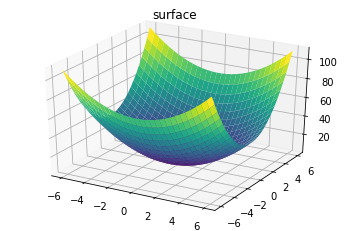

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

def f(x, y):
  return 2.0 + x**2 + 2.0 * y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

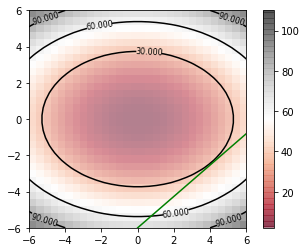

In [0]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[-6, 6, -6, 6], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();
plt.plot([0, 6], [-6, -0.8], '-k', color='green');

Minimize when the constraint line $g$ (shown in green) is tangent to the inner ellipse contour lines of $f$ (shown in black). Think about direction of the gradient arrows.

**Two constraints**
* Parallel normal constraint (= gradient constraint on $f$, $g$ s.t. solution is a max, or a min)
* $g(x)=0$ (solution is on the constraint line as well). We now recast these by combining $f$, $g$ as the new Lagrangian function by introducing new ‘slack
variables’ denoted $a$ or (more usually, denoted $\alpha$ in the literature)

**The method of Lagrange multipliers**

Let
$$
L(x,a) = f(x) - a g(x).
$$
Now consider
$$
\frac{\partial L}{\partial x} = 
  \frac{\partial f}{\partial x} -
a \frac{\partial g}{\partial x},
$$
but since $\partial_x f = a\, \partial_x g$ we have
$$
\frac{\partial L}{\partial x} = 0.
$$
And derivative with respect to $a$
$$
  \frac{\partial L}{\partial a} = - g(x) = 0.
$$


##Fitting a support vector machine

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a two-dimensional SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)
  # plot decision boundary and margins
  ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# lines pass through support vectors
# any points further from the margin that are on the correct side do not modify the fit

In [0]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Text(0.5, 1.0, 'N = 120')

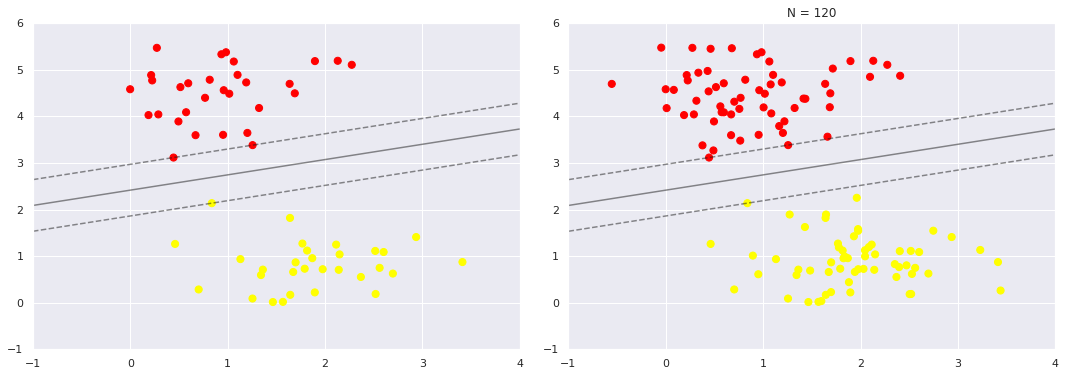

In [0]:
def plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)
  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)
  
  
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, axi)
axi.set_title('N = {0}'.format(N))

# In the right panel, we have doubled the number of training points, but the model has not changed

In [0]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

##Beyond linear boundaries: Kernel SVM

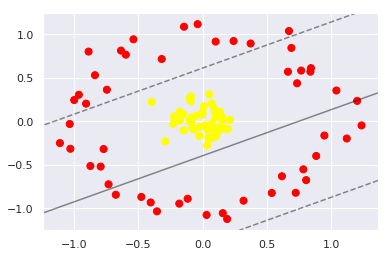

In [0]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [0]:
# a radial basis function in adition to the existing ones
r = np.exp(-(X ** 2).sum(1))

In [0]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')

interact(plot_3D, elev=[-90, -45, 0, 45, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, -45, 0, 45, 90), value=-90), IntSlider(value=…

*  radial basis centering matters -- no good results if chosen wrongly
*  try every possible centering solves the problem but computationally "no good"
*  kernel trick saves the day, see  [Wikipedia on kernel trick](https://en.wikipedia.org/wiki/Kernel_method)

In [0]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

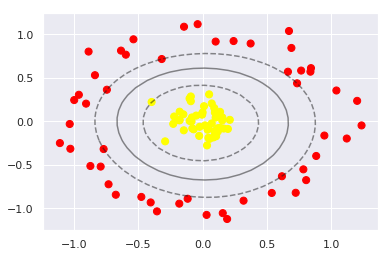

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

##Tuning the SVM: Softening margins

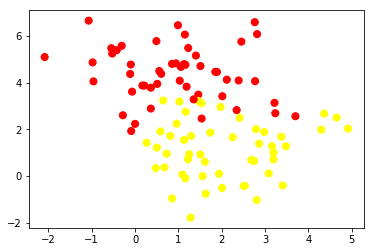

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

# Problem: data overlaps, no "hard" margin

The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called **soft margin classification**.

You can control this balance using the C hyperparameter: a smaller $C$ value leads to a wider street but more margin violations.

* If your SVM model is overfitting, you can try regularizing it by
reducing $C$.

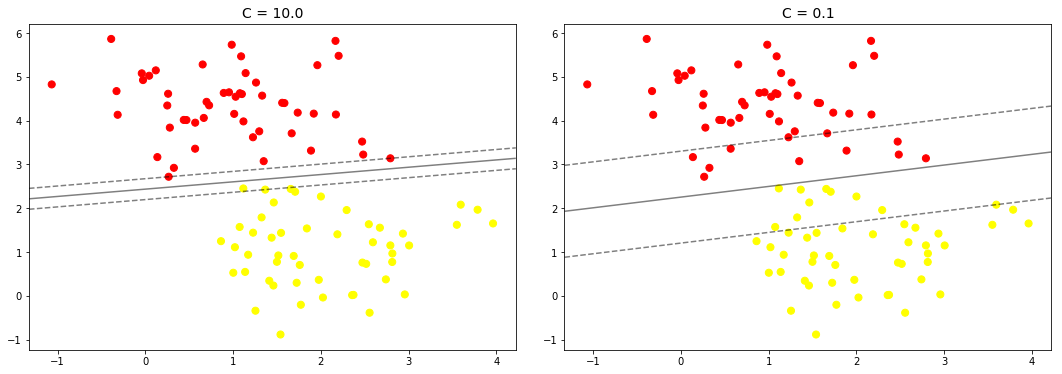

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
import numpy as np

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C).fit(X, y)
  axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  plot_svc_decision_function(model, axi)
  axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
  axi.set_title('C = {0:.1f}'.format(C), size=14)
  
# the optimal value of the C parameter will depend on your dataset
# should be tuned via cross-validation or a similar procedure

#Example: Face Recognition

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


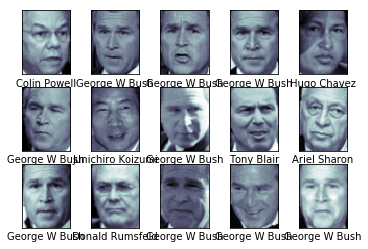

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
  
# see a sample of dataset

In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# use PCA to extract features
# we will learn what is PCA later

In [0]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=3)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

# be careful if parameters fall towards edges
# it better be the case parmeters closer to the center of the grid

CPU times: user 37.9 s, sys: 9.61 s, total: 47.5 s
Wall time: 27.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

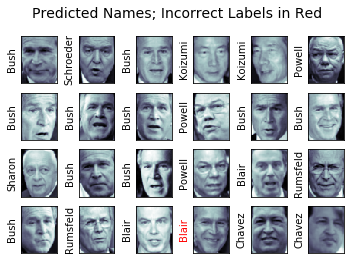

In [0]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



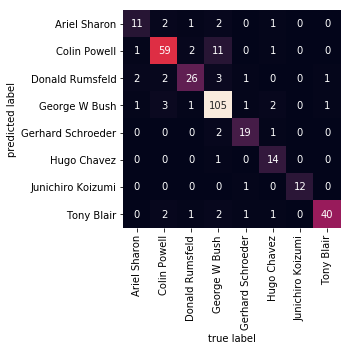

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#Support Vector Machine Summary

**Advantages**

*   Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
*   Once the model is trained, the prediction phase is very fast.
*   Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
*   Their integration with kernel methods makes them very versatile, able to adapt to many types of data.



**Disadvantages**


*   The scaling with the number of samples $N$ is $O(N^3)$ at worst, or $O(N^2)$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
*   The results are strongly dependent on a suitable choice for the softening parameter C . This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
*   The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the probability parameter of SVC ), but this extra estimation is costly.

